# 岭回归

回归算法是最常用的算法之一。回归算法的形式十分简单，它期望使用一个超平面来拟合数据集。如果数据集中的变量存在线性关系，那么其就能拟合地非常好。在实际应用中，简单的线性回归常常被正则化的回归方法（Ridge、LASSO和Elastic-Net）所代替。正则化其实是为了避免过拟合的一种技术手段，采取惩罚项以降低模型过拟合的风险。我们今天所介绍的岭回归(Ridge Regression)是一种针对普通最小二乘法所存在的不足进行的一种改进，是在平方误差的基础上增加正则化项，即增加了L2惩罚项。所以岭回归就是一种带二范数惩罚的最小二乘回归。

一般的回归模型很容易发生过拟合的问题。我们首先来看多项式回归的过拟合现象。理论上，只要多项式的阶数足够高，多项式就能够以任意精度来逼近我们的训练数据，只是此时，往往伴随而来的就是过拟合了。

可以看出，多项式回归为了更好地拟合我们的训练数据，生成的模型往往伴随着非常大的回归系数，而这些系数大到使得模型的可解释性非常弱。

样本数量很少时，随着模型复杂度的增加，很容易发生过拟合，此时回归得不到有意义的结果，然而当我们有足够多的观察样本时，由于此时我们的训练数据可以很好地代表真实的世界，回归会有较小的方差，则很难发生过拟合。

我们由普通最小二乘法所生成的模型，为了尽可能地去拟合训练样本，而产生的模型带有很大数量级的回归参数，而这种模型往往会在测试集上表现的很糟糕。我们能否去解决这个棘手的问题呢？现在我们进一步讨论。

首先我们先试图建立一个用来衡量模型好坏的损失函数。

对于回归问题来说，我们来衡量模型的好坏主要表现在模型精度和模型的解释能力两个方面。关于这个损失函数，一方面，我们要尽可能的拟合训练数据，另一方面，我们又想得到具有一些较小数量级的参数，没有发生过拟合的模型。因此总的损失函数（total cost）可以分为两部分，即

**total cost = measure of fit + measure of magnitude of coefficients**.

首先，关于衡量对训练数据拟合程度的指标，我们可以回顾最小二乘法当中的RSS(Residual Sum of Squares)指标。当RSS很小时，则说明模型拟合的非常好。

其次，关于衡量回归系数量级的指标我们应该如何去定义呢？

第一种形式，系数求和。假若\\({w_0}\\)=554845，\\({w_1}\\) =-556253,而此时\\({w_0} + {w_1}\\) =small。显然这不是一种理想的方式。

第二种形式，绝对值求和，也就是常说的1范数，这种形式看起来很好，不过我们要在LASSO回归中讨论这种形式的利用。

第三种形式，平方和形式，也就是常说的2范数。这种形式可以很好的刻画这个尺度。

在岭回归中我们选用第三种形式来度量回归系数的量级。

至此，我们可以明确的定义总误差（total cost），一共包含两部分。即我们需要考虑最小化的损失函数为 
\\( RSS({\bf{w}}) + \lambda \left\| {\bf{w}} \right\|_2^2 \\)。

在这里， \\(\lambda \\)是我们需要调整的一个参数，叫做岭参数，通过调整\\(\lambda \\) 的大小，用来平衡代价函数中两个指标的尺度。惩罚函数的系数 \\(\lambda \\)越大，目标函数中惩罚项所占的重要性就越高。

如果\\(\lambda \\) 等于0，此时的损失函数就是最小二乘法的形式，所对应的解就是最小二乘法的解 \\( {{\bf{\hat w}}^{LS}} \\) ；

如果 \\(\lambda \\)为无穷大，当 \\( {\bf{\hat w}} \\) 不等于0时，则总误差达到无穷大，

&emsp;&emsp;&emsp;&emsp;当 \\( {\bf{\hat w}} \\) 等于0时，此时total cost =RSS(0),解就是\\( {\bf{\hat w}} \\)  =0；

如果 \\(\lambda \\)介于0和无穷大之间，则有 \\(0 \le \left\| {{\bf{\hat w}}} \right\|_2^2 \le \left\| {{{{\bf{\hat w}}}^{LS}}} \right\|_2^2\\)。


上面的这个形式就是**岭回归**了，也叫做**L2正则化**。
到这里，我们已经完整的介绍了岭回归目标函数的形式。我们可以看出，岭回归是最小二乘法的一种改进，为了解决过拟合的问题，而增加了L2惩罚项。通常，它的原理是牺牲最小二乘法解的无偏性来换取数值解的稳定性，降低精度为代价，使获得回归系数更为符合实际、更可靠。

我们简单回顾一下模型的方差和偏差。模型的偏差指的是模型预测值和数据之间的差异，而方差指的是模型之间的差异。岭回归中我们需要通过不断调整 \\(\lambda \\)，确定惩罚强度，来权衡模型的方差和偏差，以让模型在欠拟合和过拟合之间达到平衡。

对于岭回归的损失函数形式，

当  \\(\lambda \\)较大时，模型具有较高的偏差，而较小的方差；

当  \\(\lambda \\)较小时，模型具有较小的偏差，而较高的方差，例如当 \\(\lambda \\) =0时，就相当于最小二乘法。

本质上，  \\(\lambda \\)控制了模型的复杂度，岭回归的意义就是通过控制 \\(\lambda \\) ，牺牲模型的精确度，而增加模型的泛化能力。通过调整 \\(\lambda \\) 的值可以在方差和偏差之间得到权衡。

我们先来看对于给定  \\(\lambda \\)值的岭回归模型。

第一步，为了记法简洁，我们用矩阵符号重写损失函数total cost。

利用最小二乘法中的记法
$$\begin{array}{c}
RSS({\bf{w}}) = \sum\limits_i {({y_i} - h{{({x_i})}^T}{\bf{w}})} \\
 = {({\bf{y}} - {\bf{Hw}})^T}({\bf{y}} - {\bf{Hw}})
\end{array}$$

回归系数的二范数

$$ \begin{array}{c}
\left\| {\bf{w}} \right\|_2^2 = w_0^2 + w_1^2 + w_2^2 +  \cdots  + w_D^2\\
 = {{\bf{w}}^T}{\bf{w}}
\end{array}$$

于是，岭回归的损失函数可以写为

$$ \begin{array}{c}
RSS({\bf{w}}) + \lambda \left\| {\bf{w}} \right\|_2^2\\
 = {({\bf{y}} - {\bf{Hw}})^T}({\bf{y}} - {\bf{Hw}}) + \lambda {{\bf{w}}^T}{\bf{w}}
\end{array}$$

第二步，对于优化问题,我们最常用的就是梯度下降法。
求岭回归代价函数的梯度

$$\begin{array}{c}
\nabla RSS({\bf{w}}) + \lambda \left\| {\bf{w}} \right\|_2^2\\
 = \nabla {({\bf{y}} - {\bf{Hw}})^T}({\bf{y}} - {\bf{Hw}}) + \lambda {{\bf{w}}^T}{\bf{w}}\\
 =  - 2{{\bf{H}}^T}({\bf{y}} - {\bf{Hw}}) + 2\lambda {\bf{w}}
\end{array}$$

第三步，我们可以有两种实现方式。

其一，令梯度直接等于0，

$$\nabla {\mathop{\rm cost}\nolimits} ({\bf{w}}) =  - 2{{\bf{H}}^T}({\bf{y}} - {\bf{Hw}}) + 2\lambda {\bf{w}} = 0$$

解得 \\({{\bf{\hat w}}^{ridge}} = {({{\bf{H}}^T}{\bf{H}} + \lambda {\bf{I}})^{ - 1}}{{\bf{H}}^T}{\bf{y}}\\)


在这里，我们从代数的角度，简要的分析一下岭回归所做的事情。

在回归分析中最常用的方法是最小二乘法，而使用最小二乘法的一个前提是 \\(|{{\bf{H}}^T}{\bf{H}}|\\)不为零，即矩阵 \\({{\bf{H}}^T}{\bf{H}}\\)非奇异，当各个特征之间有较强的线性相关性时，矩阵\\({{\bf{H}}^T}{\bf{H}}\\) 的行列式比较小，甚至趋近于0，此时这个矩阵不能求逆，这种病态矩阵在计算过程中容易造成约数误差，很不稳定，在具体取值上与真实值有较大的偏差，因此得到的数据往往缺乏稳定性和可靠性。而岭回归通过引入  \\(\lambda \\)参数，使得该问题得到解决。岭回归通过增加惩罚项，实际上是在矩阵\\({{\bf{H}}^T}{\bf{H}}\\) 的主对角线元素上人为地增加一个非负因子，修复矩阵达到较好的效果。


基于这个特点，对于多元回归来说，岭回归可用来解决数据的共线性问题。

其二，我们用另一种常见的方法求解
\\({\bf{w}}\\) ，也就是梯度下降法，不断的向最优解移动。

根据损失函数的梯度 
\\(\nabla {\mathop{\rm cost}\nolimits} ({\bf{w}}) =  - 2{{\bf{H}}^T}({\bf{y}} - {\bf{Hw}}) + 2\lambda {\bf{w}}\\)

对于第 \\( j\\)个特征的权重 \\( w_j\\)使用更新公式

$$ 
w_j^{(t + 1)} \leftarrow w_j^{(t)} - \eta *[ - 2\sum\limits_{i = 1}^N {{h_j}({x_i})({y_i} - {{\hat y}_i}({{\bf{w}}^{(t)}})) + 2\lambda w_j^{(t)}}]$$

$$ \leftarrow (1 - 2\eta \lambda )w_j^{(t)} + 2\eta \sum\limits_{i = 1}^N {{h_j}({x_i})({y_i} - {{\hat y}_i}({{\bf{w}}^{(t)}}))} $$

\\(\eta \\)为学习率。综上，我们可以得到岭回归算法的完整流程。

接着我们来讨论另一个重要的问题。也就是我们应该如何确定岭回归中的参数 \\(\lambda \\)呢？

![](http://i.imgur.com/UYiZeoq.png)


我们绘制出岭参数 \\(\lambda \\)和回归系数之间的关系图，叫做岭迹图。当 \\(\lambda \\)=0时，也就是最小二乘法的结果。我们可以看到随着 \\(\lambda \\)的增大，回归系数的绝对值在不断的减小；当 \\(\lambda \\)趋于无穷大时，\\({\bf{w}}\\) 将趋于0。

岭参数选择的一般原则是使我们的模型中不存在明显不合常理的回归参数，其岭估计的符号应当要变得合理，回归系数没有不合实际意义的绝对值。

假如我们有足够多的数据时，我们可以按照合理的比例把数据分为训练集、验证集和测试集三部分。在训练集上拟合出\\({\hat w_\lambda }\\) ,在验证集上选择最优的\\(\lambda \\) 值\\({\lambda ^ * }\\) ，进一步在测试集进行评估和预测。

不幸的是，当我们只有一个很小的数据集时，这种方法还能使用吗？

在这种情况下，我们仍然需要留出一小部分数据来作为测验集，问题的关键就是我们该如何利用剩下的数据去找到一个不错的\\(\lambda \\) 呢？

如果我们仍然按照之前的方式，把这部分数据分为训练集和验证集，此时，验证集只包含了很小一部分数据，显然不足以保证我们能选择到一个不错的 \\(\lambda \\)。针对这个问题，下面我们将学习到一个关键的技术，**K折交叉验证**。

k折交叉验证的思想就是，我们把余下的数据随机的分为K组，之后把每一组都当作验证集，其他组的数据当作训练集去拟合出一个模型，用这个模型在验证集上得到相应的误差\\(erro{r_i}\\),依次往下进行，直到最后我们就得到了k个误差值  \\( erro{r_i}(\lambda )(i = 1,2, \cdots ,K) \\) 。

我们把所有的误差的平均值 \\( CV(\lambda ) = \frac{1}{K}\sum\limits_{k = 1}^K {erro{r_k}(\lambda )} \\)当作此时我们指定的\\(\lambda \\) 所对应的误差值。


至此，对于每一个 \\(\lambda \\)值都重复此进程，我们画出岭参数\\(\lambda \\) 和平均误差之间的变化关系，即可选择出最优的 \\(\lambda \\)值。


当然，利用k折交叉验证集，不可避免的就要确定k的取值。

一般的，最好的近似就是把每一个样本点单独作为验证集，也就是留一交叉验证法（leave-one-out cross validation）。但是，此时对于每个 \\(\lambda \\)，需要作N次拟合，需要花费的大量的时间，消耗巨大的计算资源。

经验上，k的取值常常取为5或者10，也就是5折交叉验证和10折交叉验证集。

接下来，我们通过一个简单的数据集演示，来实现岭回归的一个简单实现。


用回归分析进行房价预测是kaggle竞赛中一个经典的案例。回归分析在房价预测中有广泛的运用。我们利用几个数据集来实现一个岭回归的简单演示。这个数据集是华盛顿的Kung country的房价数据集，我们来建立一个回归模型来实现房价的预测。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float,
              'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 
              'yr_built':int,'id':str, 'sqft_lot':int, 'view':int}

In [3]:
sales = pd.read_csv('kc_house_train_data.csv', dtype=dtype_dict) #导入数据
sales = sales.sort(['sqft_living','price'])  # 按照房屋面积排序

C:\Users\lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [4]:
print "sales data shape:", sales.shape

sales data shape: (9761, 21)


In [5]:
sales.head()  #数据展示

id             date     price  bedrooms  bathrooms  sqft_living  \
8840  3980300371  20140926T000000  142000.0       0.0       0.00        290.0   
6982  2856101479  20140701T000000  276000.0       1.0       0.75        370.0   
8338  1222029077  20141029T000000  265000.0       0.0       0.75        384.0   
2228  6896300380  20141002T000000  228000.0       0.0       1.00        390.0   
9631  9266700190  20150511T000000  245000.0       1.0       1.00        390.0   

      sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
8840     20875     1.0           0     0     ...          1         290   
6982      1801     1.0           0     0     ...          5         370   
8338    213444     1.0           0     0     ...          4         384   
2228      5900     1.0           0     0     ...          4         390   
9631      2000     1.0           0     0     ...          6         390   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
8840              0      1963             0    98024  47.5308 -121.888   
6982              0      1923             0    98117  47.6778 -122.389   
8338              0      2003             0    98070  47.4177 -122.491   
2228              0      1953             0    98118  47.5260 -122.261   
9631              0      1920             0    98103  47.6938 -122.347   

      sqft_living15  sqft_lot15  
8840         1620.0     22850.0  
6982         1340.0      5000.0  
8338         1920.0    224341.0  
2228         2170.0      6000.0  
9631         1340.0      5100.0  

[5 rows x 21 columns]

可以看出，这个数据集包含9761条记录，而且每条房价数据都包含多个属性。例如

price        房价

bedrooms     卧室数量

bathrooms    浴室数量

sqft_living  居住面积

...          ...

等等

In [6]:
sales.price.describe() #房价数据描述

count    9.761000e+03
mean     5.427350e+05
std      3.795276e+05
min      8.000000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.490000e+05
max      7.700000e+06
Name: price, dtype: float64

可以看出，房价数据的均值，标准差，最大值，最小值等。

接下来，我们需要了解房价数据的分布。绘制直方图如下。

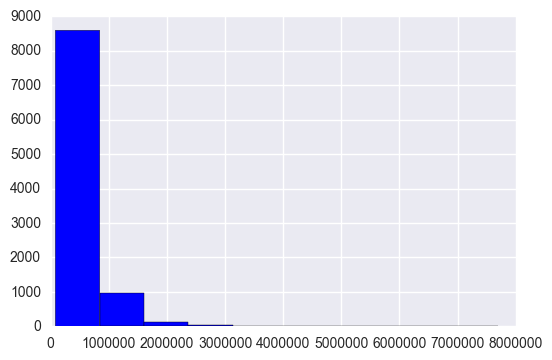

In [7]:
plt.hist(sales.price, color='blue')
plt.show()

In [8]:
numeric_features = sales.select_dtypes(include=[np.number])  #找出数值型变量
numeric_features.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot           int32
floors           float64
waterfront         int32
view               int32
condition          int32
grade              int32
sqft_above         int32
sqft_basement      int32
yr_built           int32
yr_renovated       int32
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

In [9]:
corr = numeric_features.corr()        #计算这些变量之间的相关系数

print  corr['price'].sort_values(ascending=False)[:5], '\n'   #输出和房价正相关性最高的5个因素
print  corr['price'].sort_values(ascending=False)[-5:]        #输出和房价相关性最低的5个因素

price            1.000000
sqft_living      0.705052
grade            0.665567
sqft_above       0.611453
sqft_living15    0.584807
Name: price, dtype: float64 

sqft_lot      0.094143
sqft_lot15    0.077943
yr_built      0.051759
condition     0.044732
long          0.023754
Name: price, dtype: float64


可以看出，和房价（price）相关性最大的因素为房屋面积（sqft_living）。
进一步，为了更加清楚的了解变量之间的相关性，我们可以绘制出相关系数矩阵。

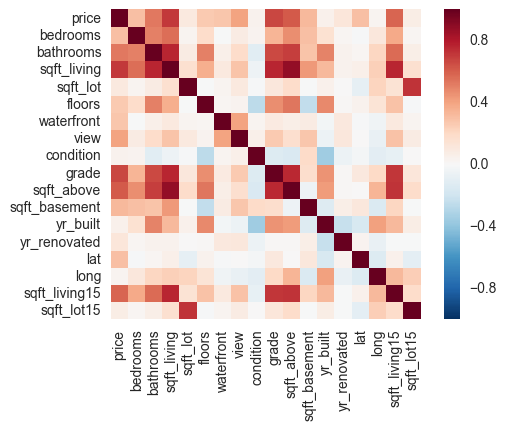

In [10]:
corr = numeric_features.corr()        #计算这些变量之间的相关系数
sns.heatmap(corr, vmax=1, square=True);   #相关系数矩阵
plt.show()

带有相关性系数的矩阵

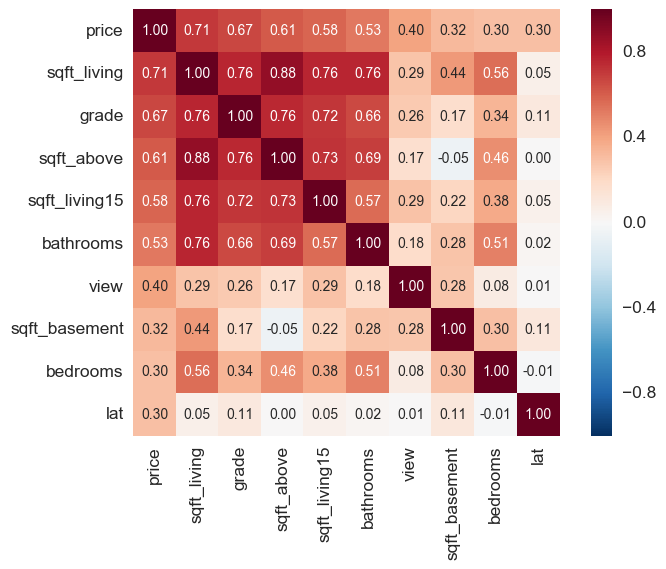

In [11]:
k = 10   #number of variables for heatmap
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(sales[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

从图中可以看出：
‘sqft_living’, ‘grade’ 以及 ‘sqft_above’ 与 ‘price’有很强的相关性。
‘sqft_living’ 和 ‘sqft_above’ 也是相关性比较强的变量， 即变量之间存在共线性，所以我们在模型中只需要其中的一个变量。
‘bedrooms’ 和 ‘price’相关性不强。

price和相关变量之间的散点图矩阵

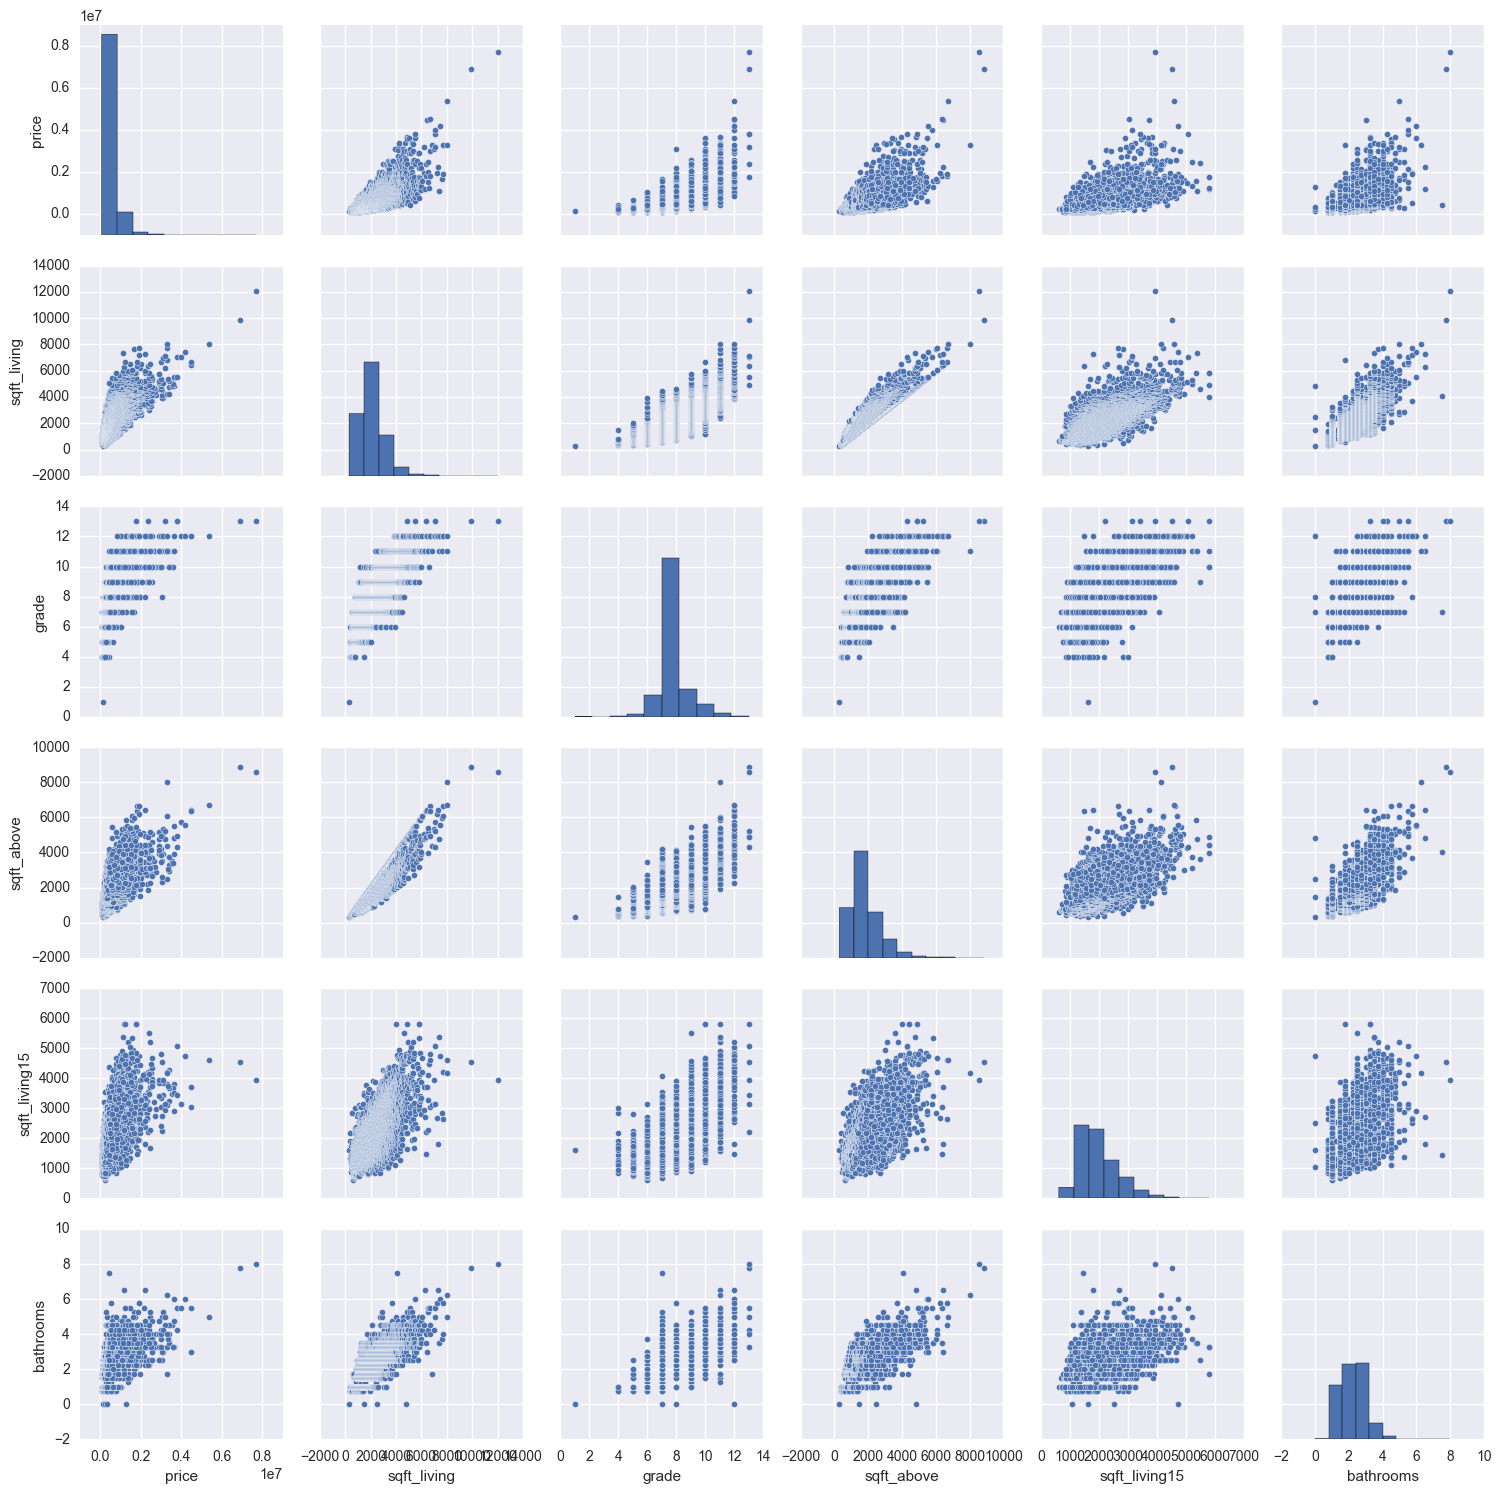

In [12]:
sns.set()
cols = ['price', 'sqft_living', 'grade','sqft_above', 'sqft_living15', 'bathrooms']
sns.pairplot(sales[cols])
plt.show()

这里，我们只是展现岭回归，简单起见，只建立房屋面积（sqft_living）单个因素和房价（price）之间的岭回归模型。

定义一个DataFrame类型的数据，存放自变量不同次方的数据。

In [13]:
def polynomial_dataframe(feature, degree): #定义一个DataFrame类型的数据，存储变量的不同乘方。
    poly_dataframe = pd.DataFrame()
    poly_dataframe['power_1'] = feature  #数据的一次方等于原数据
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)  #命名
            poly_dataframe[name] = poly_dataframe['power_' + str(power-1)] *feature  
    return poly_dataframe

我们先设置一个比较小的岭参数，来实现岭回归。

In [14]:
l2_small_penalty=1e-9

[  3.99586476e+02  -3.00291414e-01   1.67342377e-04  -4.91388692e-08
   8.45442338e-12  -5.48437891e-16  -3.38756966e-20   2.76116528e-24
   3.03647383e-28   4.95829168e-33  -1.16141287e-36  -1.27517440e-40
  -6.17786000e-45   1.06893655e-49   6.38542356e-53]
95584.2256262


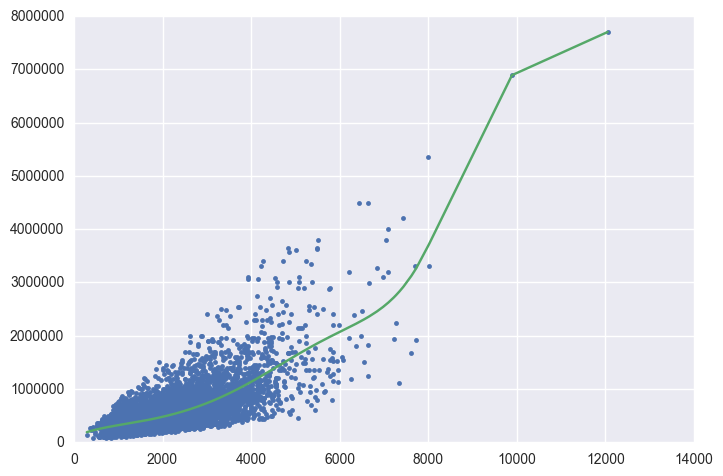

In [15]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)   
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)  #以l2_small_penalty=1e-9为岭参数实现岭回归
model.fit(poly15_data, sales['price'])
print model.coef_   #输出模型
print model.intercept_   #输出截距

plt.plot(sales['sqft_living'],sales['price'],'.',sales['sqft_living'], model.predict(poly15_data),'-')  
plt.show()

和一般的线性回归不同，岭回归引入了正则化参数来“缩减”相关系数。为了直观的感受岭回归中惩罚项的作用，接下来我们设置一个较大的岭参数，利用同一个数据集，重新建立岭回归模型。

In [16]:
l2_large_penalty=1.23

[  7.12812307e+01   1.20119148e-02   1.48611872e-06   1.06902691e-10
   5.27414693e-15   2.15798926e-19   7.19021517e-24   8.78690451e-29
  -1.81095636e-32  -2.85525366e-36  -3.13308480e-40  -3.05205119e-44
  -2.81009380e-48  -2.50665922e-52  -2.19233921e-56]
300628.530734


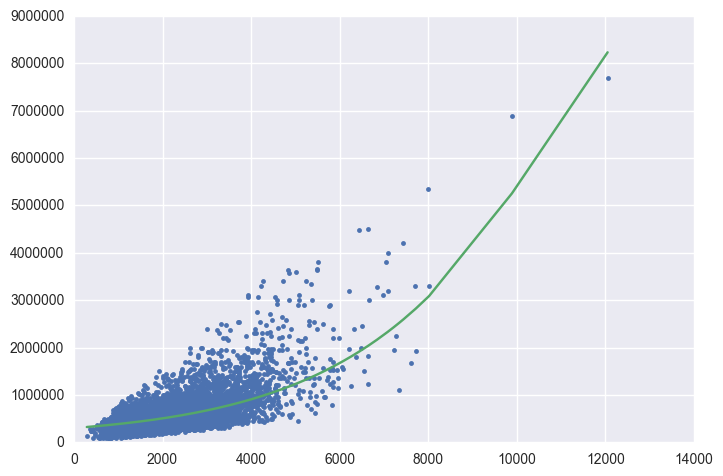

In [17]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
model = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)  #以l2_large_penalty=1.23为岭参数实现岭回归
model.fit(poly15_data, sales['price'])
print model.coef_  #输出模型
print model.intercept_  #输出截距

plt.plot(sales['sqft_living'],sales['price'],'.',sales['sqft_living'], model.predict(poly15_data),'-')
plt.show()

对比两次拟合的结果，我们发现，当岭参数较小时，一次项前的系数为3.99586476e+02，而当岭参数较大时，一次项前的回归系数为7.12812307e+01，可以看出，随着惩罚项作用的增强，回归系数的绝对值在减小。 

接下来，我们通过k折交叉验证来选择合适的岭参数。

In [18]:
train_valid_shuffled = pd.read_csv('kc_house_train_valid_shuffled.csv', dtype=dtype_dict) #重新导入一个数据集，利用这个数据集来进行10折交叉验证。
test = pd.read_csv('kc_house_test_data.csv', dtype=dtype_dict)   # 导入测验集

根据k折交叉验证的思想，编写函数。

In [19]:
def k_fold_cross_validation(k, l2_penalty, data, output_name):  #定义k折交叉验证函数
    n = len(data)
    RSS=0
    for i in range(k):
        start = n*i/k  
        end = n*(i+1)/k     
        validation_set = data[start:end] #选择1/k的数据作为验证集
        first_t = data[0:start]
        second_t = data[end:n]
        train_set = first_t.append(second_t)  #剩余数据作为训练集
        model = linear_model.Ridge(alpha=l2_penalty, normalize=True)  #建立岭回归模型
        model.fit(train_set, train_set['price'])  
        predicted = model.predict(validation_set)
        err = predicted-validation_set[output_name]
        RSS += (err*err).sum()
    Rss = RSS/k  #取k次循环的平均误差
    return Rss  

取岭参数属于序列[10^3, 10^3.5, 10^4, 10^4.5, ..., 10^9]中的数据，我们通过交叉验证来选择最合适的岭参数。

2.64449176172e+14
2.65525075029e+14
2.65871201934e+14
2.659812601e+14
2.66016124304e+14
2.66027155422e+14
2.66030644378e+14
2.66031747743e+14
2.66032096664e+14
2.66032207003e+14
2.66032241896e+14
2.6603225293e+14
2.66032256419e+14


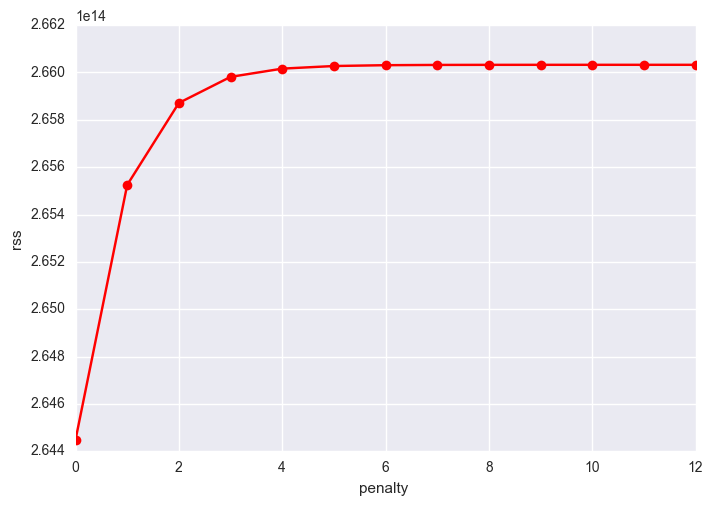

In [20]:
validata = polynomial_dataframe(train_valid_shuffled['sqft_living'],15)
validata['price'] = train_valid_shuffled['price']
penalty = np.logspace(3,9,num=13)  #岭参数
poly_dataSeries = np.zeros(13)
count= 0
for pen in penalty:
    rss = k_fold_cross_validation(10, pen, validata, 'price')
    poly_dataSeries[count] = rss
    count = count + 1
    print rss
    
plt.plot(np.arange(13),poly_dataSeries,'ro-')  #绘制rss变化曲线
plt.xlabel('penalty ')
plt.ylabel('rss')
plt.show()   

通过rss的变化过程，可以看出岭参数等于1000时，rss最小。因此，我们设定岭参数为1000，在数据集上重新训练我们最后的模型。

In [21]:
l2_penalty = 1000

In [22]:
poly15_data =polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)
model_last = linear_model.Ridge(alpha=l2_penalty, normalize=True)
model_last.fit(poly15_data, train_valid_shuffled['price'])

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [23]:
test_data =polynomial_dataframe(test['sqft_living'], 15) 
pre = model_last.predict(test_data)
err = pre-test['price']
rss = (err*err).sum()
print rss  #输出测试集的误差

2.83856861224e+14
